# COGS 108 - Educated States Use Slang Words More??

Video Link: https://drive.google.com/file/d/1qEXnTR1lnVDu8ukAGMVe4ddJWv6eVsTR/view?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

For our project, we wanted to examine the relationship between the education levels in the United States, urbanization, and culture. To evaluate this relationship, we have gathered data from Spotify Top 50 viral songs data, song lyrics data from genius, education data by US states and counties, and twitter data. With these datasets, we are able to visualize the correlation and perform an OLS regression which suggests a correlation between education and urbanization. However, when evaluating the correlation using the lyrics data, correlation was not found, showing that while urban areas may skew more educated than the nation as a whole, both college educated, and urban residents may be at similar levels of cultural awareness as their more rural and non college educated counterparts. 

# Names

- Sathvik Kaliyur
- Maricela Vasquez
- Kalaina Anderes
- Helin Ergun
- Nicholas Yamashita

<a id='research_question'></a>
# Research Question


How do the differences in education levels in U.S. states and counties influence their socio-cultural environments? To measure this, we analyze how college education rates in counties relate to urbanization, and how looped in state residents in 2019 were to trendy vocabulary as measured by the frequency in which Twitter users in the various states used words that were very common across music in Spotify's Top 50 trending music charts in that year.

``` ```

---





<a id='background'></a>

## Background & Prior Work

In this country today, there is increasing polarization among urban and rural areas, and among college educated and non college educated voters. This polarization is most apparent in the political arena where college educated voters and non college voters are continuously tending in the opposite direction. In the cultural arena, it seems as if Americans are starkly divided and that we live in cultural bubbles (1). This phenomenon coupled with the interest in music, and political/ socio-cultural trends among members of our group drove us to investigate how viral music tends to spread through the United States. There has been some research asking how social status, demographics, and political orientations correlate with music preference, but none that has looked actively at how music spreads throughout society. For example, one study found that in the 2016 primaries, enjoyment of rap music correlated with support for Bernie Sanders, and negatively correlated with support for Ted Cruz, while Religious music displayed the opposite phenomenon (1). We seek to go beyond the political arena to understand the overall cultural implications of music transmission and therefore, we are looking at education rates and level of urbanization to get to the root factors that have been identified by a bulk of work as key in creating the polarized American society we live in today (2).
We are all of course current college students who enjoy music. In navigating our world, it would be interesting to see the social and societal impacts of the music we listen to. Nicholas & Maricela are familiar working with API's and scraping data. Kalaina is familiar with working with databases, storing and retrieving data. Sathvik is heavily entrenched in the political atmosphere, thus a familiarity with possible avenues of exploration. Sathvik is very keen on finding societal data, and good at operationalizing abstract variables/topics. With the abundant data found, Helin has a knack for processing, organizing, and plotting data. We are all excited to use education data such as: https://data.ers.usda.gov/reports.aspx?ID=17829 to help us create a more clear and less biased picture of music-to-lexicon impact.

References (include links):
<br>1) https://stars.library.ucf.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1168&context=honorstheses<br>
2) https://www.theatlantic.com/politics/archive/2014/02/why-americans-are-so-polarized-education-and-evolution/284098/ <br>
3) https://aclanthology.org/L16-1686/ <br>
4) https://dipteshkanojia.github.io/files/lrec16-slangnet.pdf 






# Hypothesis


College education rates in States and Counties respectively are likely to be strongly correlated to utilization of more trendy vocabulary on social media and similarly, postively correlated with urbanization. Intuitively, those with college education would be more likely to congregate in major cities like New York or San Fransisco, and have greater exposure to emerging pop culture trends.

# Dataset(s)

Dataset
Name: Tweets<br>
Link to the dataset: https://twitter.com<br>
Number of observations: 100,000<br>
Scraped tweets that contain slang from top 50 songs. This dataset serves as the basis for our analysis of slang use by state. <br><br><br>
Dataset Name: song lyrics<br>
Link to the dataset: https://genius.com<br>
Number of observations: 50 * 365<br>
Lyrics of the top 50 viral songs<br><br><br>
Dataset Name: Education data by county<br>
This dataset contains the list of slang words that were most popular in 2019 that we ought to analyze.
Link to the dataset: https://data.ers.usda.gov/reports.aspx?ID=17829<br>
Number of observations: 3151<br>
Education data by county, of who went to college. This dataset contains the college education rate of every county in the United States. It also contains the urbanization index score of each county as well with its associated state.<br><br><br>

Dataset Name: state-abbreviations
Link: https://worldpopulationreview.com/states/state-abbreviations
Number of observations: 50
Dataset used to connect the county from our education dataset to the city from our spotify dataset
State name abbreviations to keep uniformity in our datasets and produce cleaner graphs.



# Setup

In [ ]:
import re
import json
import pandas as pd
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import csv
import random
import os
import time
import snscrape.modules.twitter as sntwitter
import itertools
import regex
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")
import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest



# Data Cleaning

**In this section we are scraping for two datasets.<br>**
**1) Top 50 viral songs from 2019, their lyrics, and if the lyrics contain any slang words <br>**
**2) Tweets from all over the USA that contain certain slang words** <br>


SlangNET is huge. It has data from a few decades worth of known slang words, found from an extensive number of platforms like, Facebook, Instagram, YouTube, Twitter,…etc. Since we are working in the year 2019 and with Twitter data, we needed to narrow down the amount of slang words that were used in our search. So we thought that since music is something enjoyed by most people from all socioeconomic classes and geographical locations, we decided to see which slang-words from SlangNET were found in the 2019 most viral songs. It is our assumption that many slang-terms come from external influences, music being one of them. 

So we took a list from SlangNET’s 2019’s top slang terms and searched the top viral songs. Any words that were not found we dropped. The remaining slang words were then used to search our Twitter & Education datasets.




# **Scraping Dataset #1 : Top 50 viral songs weekly for 2019, with lyrics.**



We have to get the top 50 songs each week of the year from Spotify. For this, we had to hand download all 52 CSV's. Then, we had to merge them.

In [ ]:
# Merge CSV's

csv_list = []

i = 2

while i <= 52:
    csv_list.append(f'songs_{i}.csv')
    i = i + 1

print(csv_list)

df_master = pd.read_csv('master.csv')

for file in csv_list:
    df = pd.read_csv(file)
    df.to_csv('master.csv', mode = 'a', header = False, index=False)

We then have to remove duplicates because some songs were trending for multiple weeks.

In [ ]:
df = pd.read_csv('master.csv')

# sort tracks alpha
df.sort_values("Track Name", inplace = True)

 # drop duplicates
df_clean = df.drop_duplicates(subset=['Track Name'])

# save
df_clean.to_csv('master_3.csv', mode = 'a', header = False, index=False)

Now that we have a clean list of songs, with artists, we have to scrape genius.com for those song lyrics. We did this part in an editor off the notebook, so we converted the CSV to JSON first as that's what the scraper requires.

In [ ]:
csvfile = open('master_3.csv', 'r')
jsonfile = open('pranaj.json', 'w')



fieldnames = ('week rank', 'song', 'artist', 'lyrics' )
reader = csv.DictReader( csvfile, fieldnames)
for row in reader:
    json.dump(row, jsonfile, indent=4)
    jsonfile.write(',\n')

Scraping Genius.com for lyrics and appending to the appropriate song/artists row. We acquired an access token and worked with the Genius.com API to then scrape the website. We filtered for just the lyrics, and appended the appropriate lyrics to the correct song name - artist. We used a try except block incase there were Javascript DOM errors.

In [ ]:
# Client Access Token
token = "t19ZRmG1y5jaY-LjD1SEFdLuTB0dDiwQab4SNxWIofs7g8XHt6uJLCX8bnd-dow1"

genius = lyricsgenius.Genius(token)
genius.response_format = 'plain'


# open json file that is in the same directory
with open('master_json.json') as f:
    # load json data into a python object
    data = json.load(f)


# loop through each song/artist and find lyrics then append to JSON obj
for tweets in data['tweets']:

    try:
        content_artist = tweets['Artist']
        content_track = tweets['Track Name']

        artist = genius.search_artist(f"{content_artist}", max_songs=1, sort="title", include_features=True)
        song = artist.song(f"{content_track}")


        print(song.lyrics)

        tweets['Lyrics'] = song.lyrics

        # Save
        with open('master_lyrics_added.json', 'w') as f:
            json.dump(data, f, indent = 2)
    except:
        continue

Now, we have the top 50 songs of each week in 2019 with each song's lyrics.

Next we will search each song's lyrics for the slang_words from our list. We are using regex to do this. We are then appending each found **slang_word** found to the "slang" column.


In [ ]:
# loop though lyrics and find the slang words and append to a new column
# using metaphorFind and metaphors becuase we were orignally going to search for metaphors instead of slang. Code still works of course


# open json file that is in the same directory
with open('master_lyrics_added.json') as f:
    # load json data into a python object
    data = json.load(f)


# loop through 'tweets' looking for certain keys
#for tweets in data['tweets']:
    #print(tweets['like count'], tweets['url'])
    #del tweets['metaphorFamily']

    # remove all emojis in tweets?

for tweets in data['tweets']:
    content = tweets['lyrics ']

    #metaphores stored here
    metaphorsFound = ''

    #metapphor family stored here
    metaphorFamilyFound = ''



# metaphorFind begin -------

    # must split tweet before putting into pandas series
    splitTweet = content.split()
    s1 = pd.Series(splitTweet)



    # metaphor categories start here --------

    # metaphor list 'Stan'
    naturalDisaster = ['stan']
    compareToNaturalDisaster = s1.str.contains('|'.join(naturalDisaster), case = False)

    counter1 = 0

    # for loop through the results to find all the true values.
    for i in compareToNaturalDisaster:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter1] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'stan '

        counter1 = counter1 + 1




    # metaphor list 'Full send'
    battle = ['full send', 'fullsend']
    compareToBattle = s1.str.contains('|'.join(battle), case = False)

    counter2 = 0

    # for loop through the results to find all the true values.
    for i in compareToBattle:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter2] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'full send ' + ', ' + metaphorFamilyFound

        counter2 = counter2 + 1




    # metaphor list 'Snatched'
    disease = ['snatched']
    compareToDisease = s1.str.contains('|'.join(disease), case = False)

    counter3 = 0

    # for loop through the results to find all the true values.
    for i in compareToDisease:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter3] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'snatched ' + ', ' + metaphorFamilyFound

        counter3 = counter3 + 1




    # metaphor list 'Woke'
    container = ['woke']
    compareToContainer = s1.str.contains('|'.join(container), case = False)

    counter4 = 0

    # for loop through the results to find all the true values.
    for i in compareToContainer:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter4] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'woke ' + ', ' + metaphorFamilyFound

        counter4 = counter4 + 1




    # metaphor list 'Flex'
    positive = ['flex']
    compareToPositive = s1.str.contains('|'.join(positive), case = False)

    counter5 = 0

    # for loop through the results to find all the true values.
    for i in compareToPositive:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter5] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'flex ' + ', ' + metaphorFamilyFound

        counter5 = counter5 + 1




    # metaphor list 'Fax'
    influx = ['fax']
    compareToInflux = s1.str.contains('|'.join(influx), case = False)

    counter6 = 0

    # for loop through the results to find all the true values.
    for i in compareToInflux:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter6] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'fax ' + ', ' + metaphorFamilyFound

        counter6 = counter6 + 1



    # metaphor list 'Receipt'
    email = ['receipt']
    compareToEmail = s1.str.contains('|'.join(email), case = False)

    counter7 = 0

    # for loop through the results to find all the true values.
    for i in compareToEmail:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter7] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'receipt ' + ', ' + metaphorFamilyFound

        counter7 = counter7 + 1



    # metaphor list 'Boomer'
    return1 = ['boomer']
    compareToReturn = s1.str.contains('|'.join(return1), case = False)

    counter8 = 0

    # for loop through the results to find all the true values.
    for i in compareToReturn:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter8] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'boomer ' + ', ' + metaphorFamilyFound

        counter8 = counter8 + 1





    # metaphor list 'Thicc'
    cart = ['thicc']
    compareToCart = s1.str.contains('|'.join(cart), case = False)

    counter9 = 0

    # for loop through the results to find all the true values.
    for i in compareToCart:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter9] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'thicc ' + ', ' + metaphorFamilyFound

        counter9 = counter9 + 1





    # metaphor list 'Ghosted'
    globalsite = ['ghosted']
    compareToGlobal = s1.str.contains('|'.join(globalsite), case = False)

    counter10 = 0

    # for loop through the results to find all the true values.
    for i in compareToGlobal:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter10] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'ghosted ' + ', ' + metaphorFamilyFound

        counter10 = counter10 + 1




    # metaphor list 'High Key'
    website = ['high key', 'highkey']
    compareToWebsite = s1.str.contains('|'.join(website), case = False)

    counter11 = 0

    # for loop through the results to find all the true values.
    for i in compareToWebsite:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter11] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'high key ' + ', ' + metaphorFamilyFound

        counter11 = counter11 + 1




    # metaphor list 'Squad'
    customerservice = ['squad']
    compareToCustomer = s1.str.contains('|'.join(customerservice), case = False)

    counter12 = 0

    # for loop through the results to find all the true values.
    for i in compareToCustomer:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter12] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'squad ' + ', ' + metaphorFamilyFound

        counter12 = counter12 + 1



    # metaphor list 'Glow up'
    account = ['glow up', 'glowup']
    compareToAccount = s1.str.contains('|'.join(account), case = False)

    counter13 = 0

    # for loop through the results to find all the true values.
    for i in compareToAccount:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter13] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'glow up ' + ', ' + metaphorFamilyFound

        counter13 = counter13 + 1




    # metaphor list 'Tea '
    sustainability  = ['tea' ]
    compareToSustainability = s1.str.contains('|'.join(sustainability), case = False)

    counter14 = 0

    # for loop through the results to find all the true values.
    for i in compareToSustainability:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter14] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'tea  ' + ', ' + metaphorFamilyFound

        counter14 = counter14 + 1



    # metaphor list 'Shook '
    active  = ['shook' ]
    compareToActive = s1.str.contains('|'.join(active), case = False)

    counter15 = 0

    # for loop through the results to find all the true values.
    for i in compareToActive:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter15] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'shook  ' + ', ' + metaphorFamilyFound

        counter15 = counter15 + 1




    # metaphor list 'Shookth '
    swim  = ['shookth' ]
    compareToSwim = s1.str.contains('|'.join(swim), case = False)

    counter16 = 0

    # for loop through the results to find all the true values.
    for i in compareToSwim:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter16] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'shookth  ' + ', ' + metaphorFamilyFound

        counter16 = counter16 + 1




    # metaphor list 'Mood '
    dress  = ['mood' ]
    compareToDress = s1.str.contains('|'.join(dress), case = False)

    counter17 = 0

    # for loop through the results to find all the true values.
    for i in compareToDress:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter17] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'mood ' + ', ' + metaphorFamilyFound

        counter17 = counter17 + 1





    # metaphor list 'cap '
    skirt  = ['cap' ]
    compareToSkirt = s1.str.contains('|'.join(skirt), case = False)

    counter18 = 0

    # for loop through the results to find all the true values.
    for i in compareToSkirt:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter18] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'cap  ' + ', ' + metaphorFamilyFound

        counter18 = counter18 + 1





    # metaphor list 'Swerve '
    pant  = ['swerve']
    compareToPant = s1.str.contains('|'.join(pant), case = False)

    counter19 = 0

    # for loop through the results to find all the true values.
    for i in compareToPant:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter19] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'swerve  ' + ', ' + metaphorFamilyFound

        counter19 = counter19 + 1




    # metaphor list 'Shade '
    shirt  = ['shade' ]
    compareToShirt = s1.str.contains('|'.join(shirt), case = False)

    counter20 = 0

    # for loop through the results to find all the true values.
    for i in compareToShirt:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter20] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'shade  ' + ', ' + metaphorFamilyFound

        counter20 = counter20 + 1





    # metaphor list 'Goat '
    short  = ['goat' ]
    compareToShort = s1.str.contains('|'.join(short), case = False)

    counter21 = 0

    # for loop through the results to find all the true values.
    for i in compareToShort:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter21] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'goat  ' + ', ' + metaphorFamilyFound

        counter21 = counter21 + 1



    # metaphor list 'Extra '
    sweater  = ['extra' ]
    compareToSweater = s1.str.contains('|'.join(sweater), case = False)

    counter22 = 0

    # for loop through the results to find all the true values.
    for i in compareToSweater:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter22] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'extra  ' + ', ' + metaphorFamilyFound

        counter22 = counter22 + 1




    # metaphor list 'Gucci '
    jacket  = ['gucci' ]
    compareToJacket = s1.str.contains('|'.join(jacket), case = False)

    counter23 = 0

    # for loop through the results to find all the true values.
    for i in compareToJacket:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter23] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'gucci  ' + ', ' + metaphorFamilyFound

        counter23 = counter23 + 1




    # metaphor list 'Lit '
    style  = ['lit' ]
    compareToStyle = s1.str.contains('|'.join(style), case = False)

    counter24 = 0

    # for loop through the results to find all the true values.
    for i in compareToStyle:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter24] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'lit  ' + ', ' + metaphorFamilyFound

        counter24 = counter24 + 1




    # metaphor list 'Lowkey '
    hat  = ['low key', 'lowkey' ]
    compareToHat = s1.str.contains('|'.join(hat), case = False)

    counter25 = 0

    # for loop through the results to find all the true values.
    for i in compareToHat:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter25] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'low key  ' + ', ' + metaphorFamilyFound

        counter25 = counter25 + 1



    # metaphor list 'Savage '
    sustainability  = ['savage' ]
    compareToSustainability = s1.str.contains('|'.join(sustainability), case = False)

    counter26 = 0

    # for loop through the results to find all the true values.
    for i in compareToSustainability:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter26] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'savage  ' + ', ' + metaphorFamilyFound

        counter26 = counter26 + 1



    # metaphor list 'Thirsty '
    thirsty  = ['thirsty' ]
    compareToThirsty = s1.str.contains('|'.join(thirsty), case = False)

    counter27 = 0

    # for loop through the results to find all the true values.
    for i in compareToThirsty:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter27] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'thirsty  ' + ', ' + metaphorFamilyFound

        counter27 = counter27 + 1


    # metaphor list 'af '
    asfuck  = ['af', 'AF' ]
    compareToAsfuck = s1.str.contains('|'.join(asfuck), case = False)

    counter28 = 0

    # for loop through the results to find all the true values.
    for i in compareToAsfuck:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter28] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'af  ' + ', ' + metaphorFamilyFound

        counter28 = counter28 + 1


    # metaphor list 'bet '
    bet  = ['bet' ]
    compareToBet = s1.str.contains('|'.join(bet), case = False)

    counter29 = 0

    # for loop through the results to find all the true values.
    for i in compareToBet:
        if i == True:
            #metaphorsFound.append(splitTweet[counter])
            metaphorsFound = splitTweet[counter29] + ' ,' + metaphorsFound
            metaphorFamilyFound = 'bet ' + ', ' + metaphorFamilyFound

        counter29 = counter29 + 1






    # metaphor categories end here --------





    # add new key:values
    # TO-DO REMOVE DUPLICATETES
    #tweets['metaphorsFound'] = metaphorsFound
    tweets['slang'] = metaphorFamilyFound


# metaphorFind END -----------





# Save python object to a json file
# First open the file we 'read' into

with open('LyricsSlagAdded.json', 'w') as f:
    json.dump(data, f, indent = 2)


In [ ]:
#Convert JSON to CSV

with open("LyricsSlagAdded.json") as file:
    data = json.load(file)

fname = "master_lyrics_added.csv"

with open(fname, "w") as file:
    csv_file = csv.writer(file)
    csv_file.writerow([])
    for item in data["tweets"]:
        csv_file.writerow([item['week rank'],item['song'], item['artist'], item['lyrics'], item['slang']])


We convert this back to CSV so we can read it in the notebook.

In [ ]:
#Convert JSON to CSV

with open("LyricsSlagAdded.json") as file:
    data = json.load(file)

fname = "master_lyrics_added.csv"

with open(fname, "w") as file:
    csv_file = csv.writer(file)
    csv_file.writerow([])
    for item in data["tweets"]:
        csv_file.writerow([item['week rank'],item['song'], item['artist'], item['lyrics'], item['slang']])


Final result.  --> Song, Artist, Lyrics, Slang Words Found in Lyrics

In [ ]:
#read in the CSV with the slang terms found

lyrics_slang = pd.read_csv('song_lyrics_slang_freq.csv')
lyrics_slang

# **Scraping for Dataset #2 : Tweets from each major U.S.A. city filtering for certain slang words**

For our project we needed a list of commonly used slang words for 2019. SlangNET, they found a way to detect slang words from social media corpus. So for 2019 they published a list, we had to use an elsevier "work around" to get the actual list.


In [ ]:
# bag of slang words for 2019 from SlangNET : https://aclanthology.org/L16-1686/   &&   https://dipteshkanojia.github.io/files/lrec16-slangnet.pdf

slang_words = ['stan', 'full send', 'snatched', 'woke', 'flex',
               'fax', 'receipt', 'boomer', 'thicc',
               'ghosted', 'high key', 'squad',
               'glow up', 'tea', 'shook', 'shookth',
               'mood', 'cap', 'swerve', 'shade', 'goat', 'extra', 'gucci', 'lit', 'low key',
               'savage', 'thirsty', 'af', 'bet']

Here, we read in and view the county data from the education dataset.

In [ ]:
#reading in county data
df_edu = pd.read_csv('edu_county.csv')
df = df_edu['County']

In [ ]:
df_state = df_edu['State']
df_state

Here we acquired the top Major Cities dataset from: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population

We read in the data and set our variables for the city and states.

In [ ]:
# reading in top Major cities in USA. Setting City and State variables.
city_state = pd.read_csv('city_state.csv')
city = city_state['City']
state = city_state['State']

state

We now scrape Twitter for tweets. We are using Twitter because it can be a decent representation of language data in text form. And it is a dataset that is diverse in time and location. We are basically scraping geographically by city, at a random point in time (within 2019) for each one of our slang words. Each city is sampled evenly in terms of amounts of scrape attempts.


In [ ]:
# Scraping Twitter for 10 slang_words words from 10 random dates in each Major city. 
# Scrapes for keyword in targeted cities.

state_count = 0

for locations in city:
    
    for word in slang_words:
        
    
        # try except block
        try:


            keyword = word
            location = locations

            # Set maximum tweets to pull

            # How many different dates (set high #)
            maxTweets2 = 5

            # How many tweets per specific date (set low # - medium #)
            maxTweets = 1

            # tweets pulled will be: maxTweets2 * maxTweets = TOTAL


            #Open/create a file to append data to
            csvFile = open('slang_tweets_City.csv', 'a', newline='', encoding='utf8')

            #Use csv writer
            csvWriter = csv.writer(csvFile)
            csvWriter.writerow(['url','date','tweet','county', 'state'])
            
            
            

            # Write tweets into the csv filter
            for i in range(maxTweets2):

                randomEndYear = int(2019)
                randomEndMonth = int((12 * random.random()))
                randomEndDay = int((28 * random.random()))
                for i,tweet in enumerate(sntwitter.TwitterSearchScraper(keyword + ' near:"{}" lang:en since:2019-01-01 until:{}-{}-{} -filter:links -filter:replies'.format(location, randomEndYear, randomEndMonth, randomEndDay)).get_items()):

                        if i > maxTweets :
                            break
                        csvWriter.writerow([tweet.url, tweet.date, tweet.content, location, state[state_count]])
                        
                        
                        
          

            
   

        except:
            continue

    
    csvFile.close()
    state_count = state_count + 1
    print(f"{location} done")




In [ ]:
# import scraped city-slang data & preview
city_slang = pd.read_csv('SlagAdded_Clean2.csv')
city_slang

We are removing duplicate tweets, based on the tweet column. Then we will have our First Scraped Dataset, "Tweets scraped by major city, random sampling in non-linear time, filtering by SlangNET's 2019 **slang_words**"

In [ ]:
# drop duplicate tweets of the major city - slang data
city_slang_clean = city_slang.drop_duplicates(subset=['tweet'])
city_slang_clean


For education data, the cleaning process was much simpler. All we needed to do was drop missing rows, and then the dataset was ready for analysis. After that, we just imported the resultant csvs that came from the data scrapping work, and strip the slang of whitespace.

In [2]:
education = pd.read_csv("Education - EducationReport (1) (1).csv")
education.dropna(axis='rows')
education.head()
abv = pd.read_csv("sc.csv")
abv.head()
lyrics = pd.read_csv("song_lyrics_slang_freq.csv")
lyrics.head()
tweet = pd.read_csv("updated_city_tweet.csv")
tweet.head()
slag = pd.read_csv("SlagAdded_Clean2.csv")
slag.head()
slag['slang'] = slag['slang'].str.strip()

# Data Analysis & Results

**Histograms**

Text(0.5, 1.0, 'Urban Index Distribution')

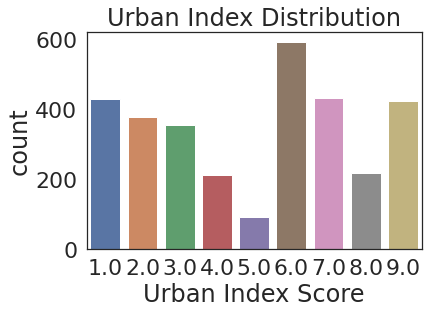

In [3]:
p = sns.countplot("Urban",data =education)
p.set_xlabel("Urban Index Score")
p.set_title("Urban Index Distribution")

This bar graph analyzes the distribution of urban index scores. Counties with the score of 5 are signifcantly more uncommon than coutneis with any other scores. However, there do not seem to be any outliers.

Text(0.5, 1.0, 'College Education Distribution')

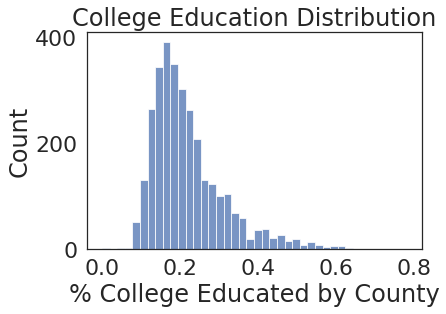

In [4]:
p = sns.histplot(x="2019",data =education,bins = 40)
plt.xlabel("% College Educated by County")
p.set_title("College Education Distribution")


This histogram charts the distribution of college education rates across American counties. This data seems skewed right with a few highly educated counties having signficantly higher college education rates than the rest. However, most counties tend to be within the 20% to 40% education rate range.

Now that the distributions of these key variables have been charted, we can now delve into some more insightful graphs.

**Multivariate Graphs**

Text(0.5, 1.0, '% College by Urban Index')

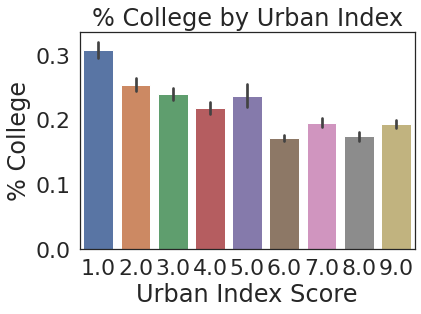

In [5]:
p= sns.barplot(x="Urban",y="2019",data = education)
p.set_xlabel("Urban Index Score")
p.set_ylabel("% College")
p.set_title("% College by Urban Index")

Now,the obvious next step is graph college education rates with urban index scores. Graphing this, we see that counties with a score of 1 have the highest rate of college education, while those with a score of 6 have the lowest. Unfortunately, there is no clear trend showing decreasing levels of college education as the index score increases. This means more analysis is required!

In [6]:
part = education['State'].unique().tolist()
corr_dict = {}
for i in part:
    df = education[(education.State == i)]
    #sns.barplot(x="Urban",y="2019",data = df)
    column_1 = df['Urban']
    column_2 = df["2019"]
    correlation = column_1.corr(column_2)
    if(abs(correlation)>.5):
        corr_dict[i] = correlation
corr_dict


{'AZ': -0.644198450561376,
 'DE': -0.9819805060619659,
 'FL': -0.693125708919179,
 'IL': -0.6081781815286073,
 'IA': -0.5025715436322338,
 'KY': -0.5247632846113541,
 'LA': -0.5023898833058986,
 'MN': -0.5398804218671762,
 'MO': -0.5126084092310675,
 'NV': -0.7154305124884399,
 'NH': -0.6866602359893941,
 'OH': -0.6155267375487595,
 'OR': -0.5375637988389662,
 'PA': -0.6332817560391005,
 'SC': -0.5221860133909334,
 'UT': -0.5076112874167206,
 'VA': -0.50102078748295,
 'WI': -0.559527667738753}

Though the overall dataset does not seem to have any clear correlation, states are very diverse and it is possible that certain states do have the correlation between urbanness and education rates. Thus, we iterated through the state data, and for each state, we went through every county and measured the pearson correlation coeffcient. In any state where there was a signficant correlation of greater than .5, we graphed the distribution of their counties.

Text(0.5, 1.0, 'Singifcant Urban College Correlations')

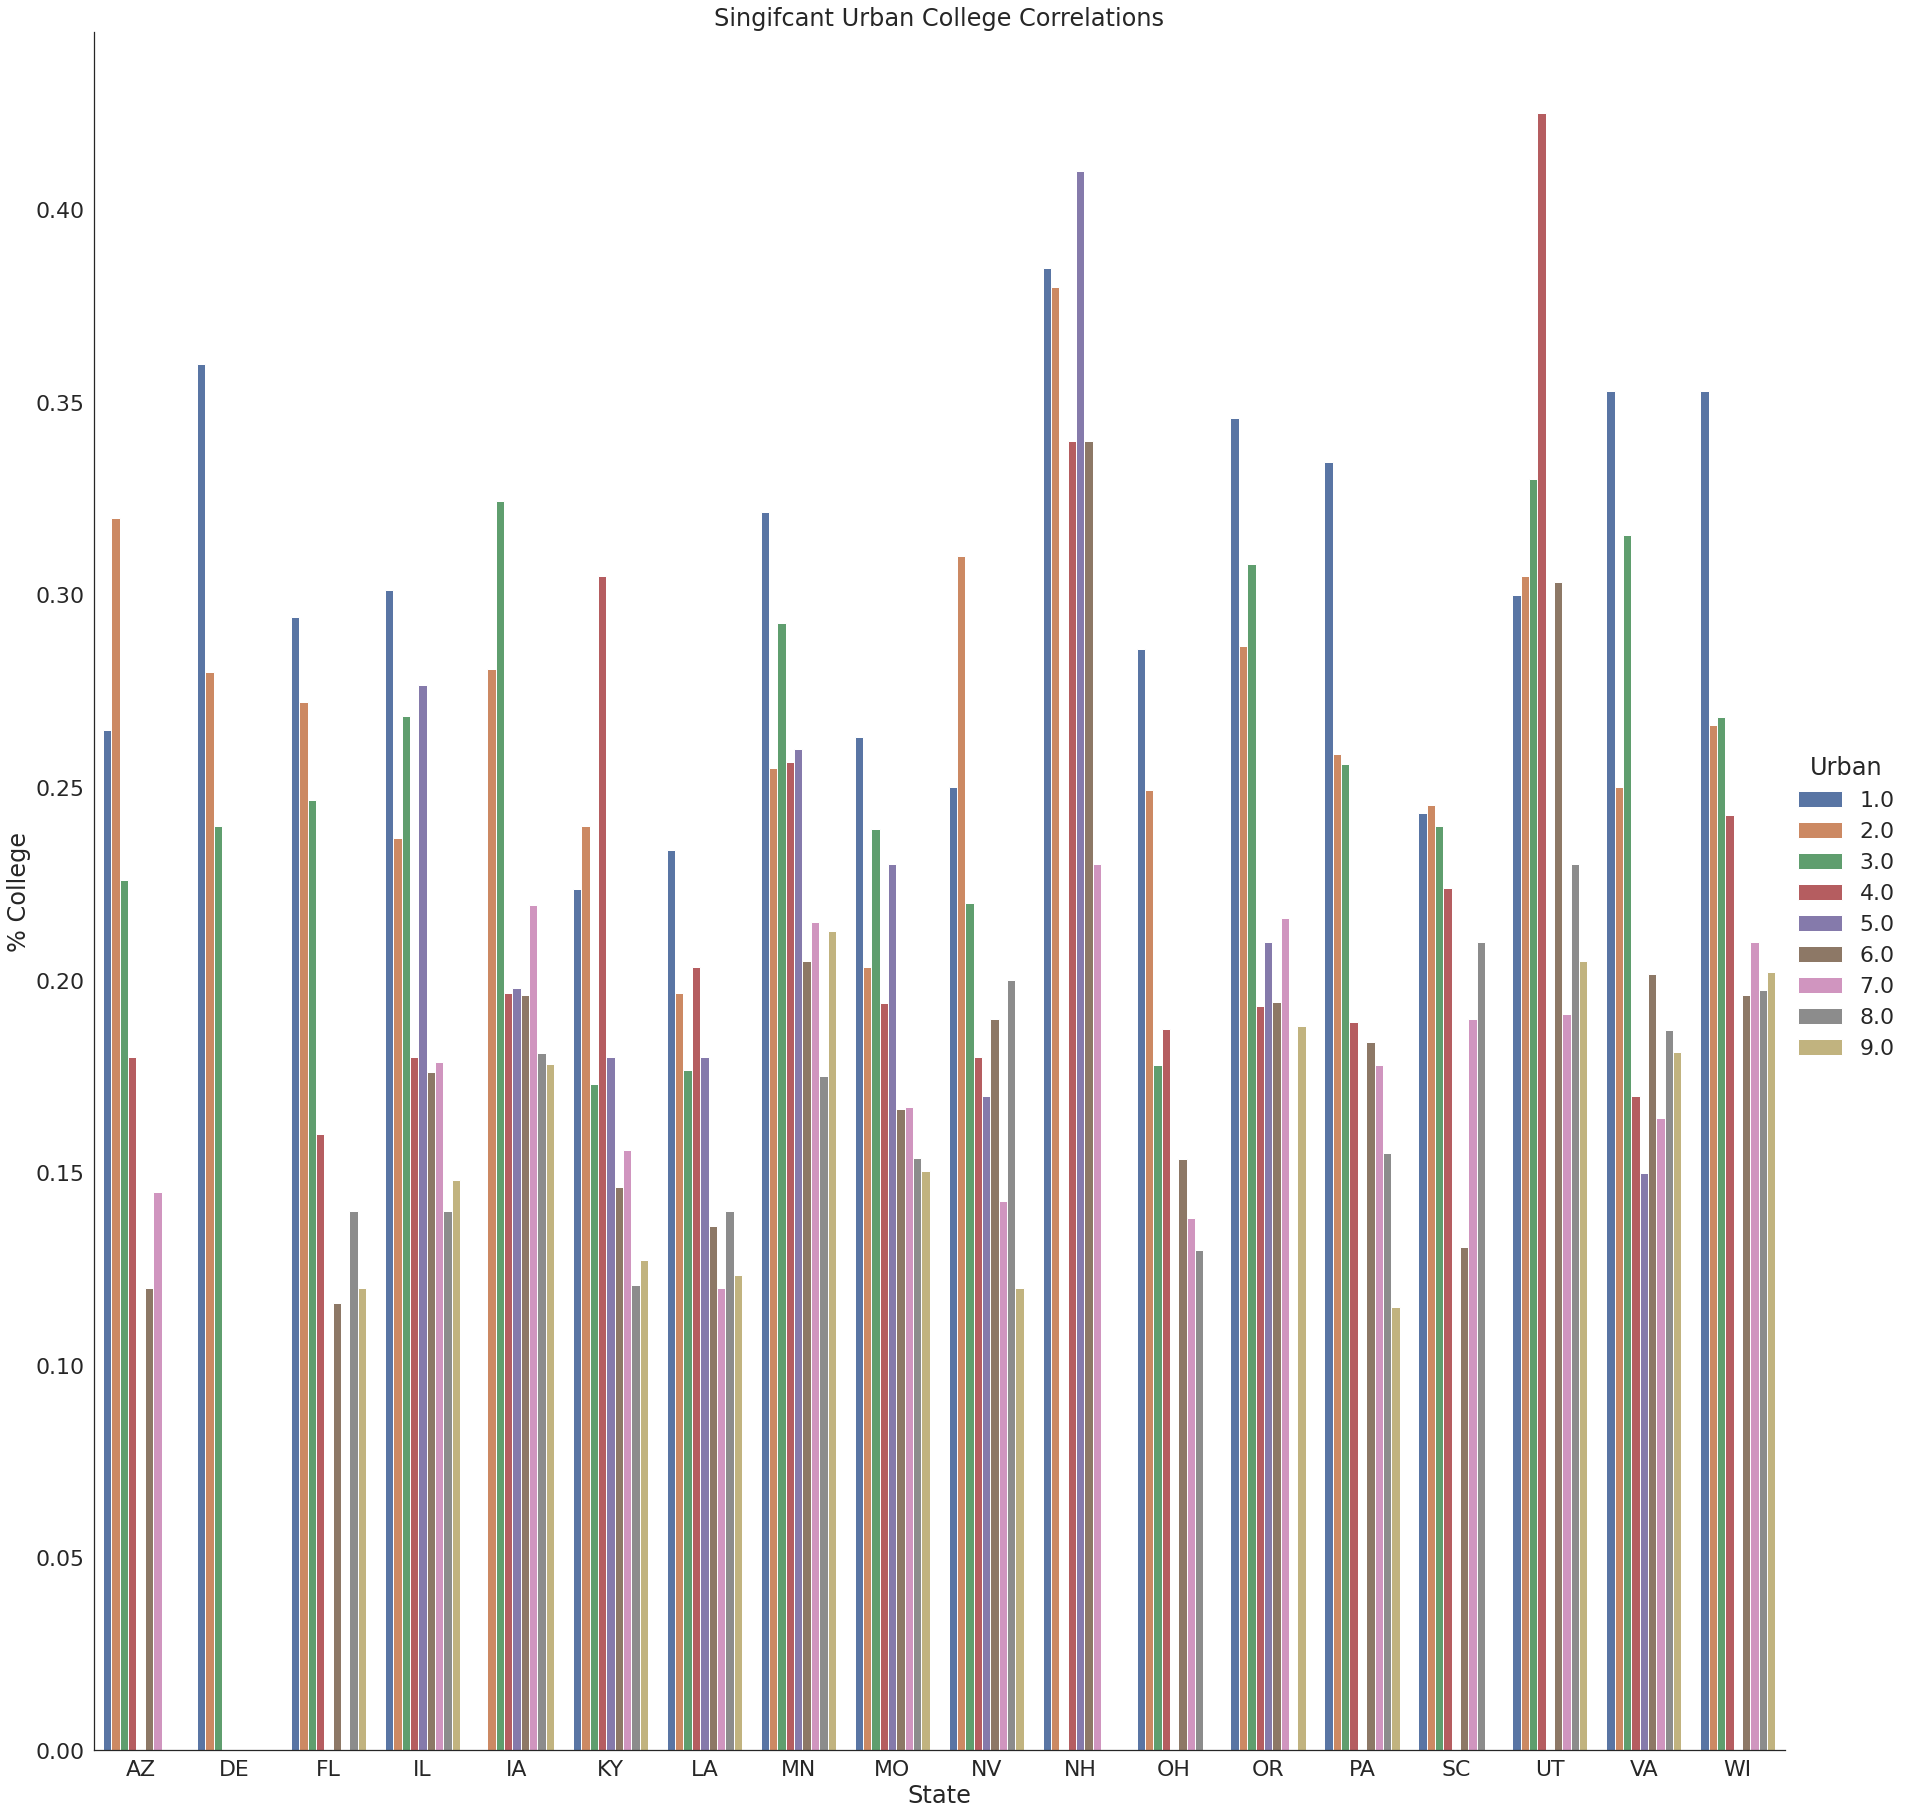

In [7]:
listy = corr_dict.keys()
df2 = education[education['State'].isin(listy)]
df2
g = sns.catplot(
    data=df2, kind="bar",
    x="State", y="2019",hue = 'Urban',height=25,ci = None)

plt.ylabel("% College")
plt.title("Singifcant Urban College Correlations")
    

As is evident, most of these states seem to have a clear pattern of urban areas being signifacntly higher educated than their rural counter parts. There are some outliers in a few of these states - for example in Kentucky and Utah, counties with an urban index of 4 tend to be the most educated by far. In New Hampshire, all counties seem to have high education rates. Overall, this graph shows us that 18 different states or 45% of all states have significant levels of correlation between urbanness and education. 

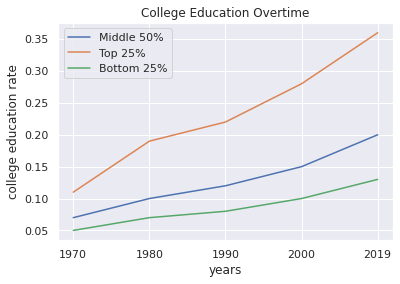

In [23]:
df2 = education[education['2019']<=.15]
df = education[education['2019']>=.3]
df3 = education[education['2019']<.3]
df3 = df3[df3['2019']>.15]
med_list = []
e_list = []
n_list = []
year_list = ['1970','1980','1990','2000','2019']
for i in year_list:
    med_list.append(df3[i].median())
for i in year_list:
    e_list.append(df[i].median())
for i in year_list:
    n_list.append(df2[i].median())
med_list
sns.lineplot(x=year_list,y=med_list)
sns.lineplot(x=year_list,y=e_list)
sns.lineplot(x=year_list,y=n_list)
plt.title("College Education Overtime")
plt.xlabel('years')
plt.ylabel('college education rate')
plt.legend(labels=["Middle 50%","Top 25%","Bottom 25%"])

Now that we found relationships in the core data itself, we wanted to look at education trends overtime. This graph shows the trends in educational attainment for the top 25%, 50%, and 75th% of counties in terms of their current 2019 education rates. Though it is clear that all counties have seen increases in college education since the 1970s, the top 25% has seen a far more dramatic increase than the other two categories. Similarly, the gap between the top group and the bottom two groups has rapidly increased since the 1970s. This could be indicative of the broader increase in inequality in American society in the last 40 years.

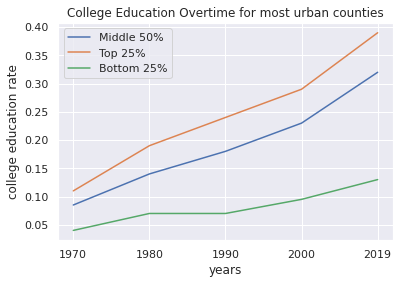

In [22]:
df7 = education[education['Urban']==1]
df2 = df7[df7['2019']<=.15]
df = df7[df7['2019']>=.3]
df3 = df7[df7['2019']<.3]
df3 = df7[df7['2019']>.15]
med_list = []
e_list = []
n_list = []
year_list = ['1970','1980','1990','2000','2019']
for i in year_list:
    med_list.append(df3[i].median())
for i in year_list:
    e_list.append(df[i].median())
for i in year_list:
    n_list.append(df2[i].median())
med_list
sns.lineplot(x=year_list,y=med_list)
sns.lineplot(x=year_list,y=e_list)
sns.lineplot(x=year_list,y=n_list)

plt.title("College Education Overtime for most urban counties")
plt.xlabel('years')
plt.ylabel('college education rate')
plt.legend(labels=["Middle 50%","Top 25%","Bottom 25%"])

This increasing inequality is even more evident in counties with an urbanness index of 1. The top category (top 25%) has increased by almost 30% since 1970, while the median group has increased by 23%. The bottom group of counties has only increased by less 8%. When we looked at other urban score groups we found inequality but it was not nearly as stark. Again, examining portions of the data has allowed us to gain clearer insights.

In [10]:
education = education.rename(columns={'2019':'year'})
dependent, predictors = patsy.dmatrices('year ~ Urban',education)
model = sm.OLS(dependent,predictors)
res_1 = model.fit()

In [11]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     625.3
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          5.32e-126
Time:                        08:09:33   Log-Likelihood:                 3206.3
No. Observations:                3141   AIC:                            -6409.
Df Residuals:                    3139   BIC:                            -6396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2920      0.003     89.224      0.0

Finally, after investigating potential relationships within various portions of the dataset, we went back to determine the core question of whether urbanization correlates with education. The inital graph between college education rates and urbanization suggested that it would not, but given what we found with signifcant relationships in many states, we thought it would be prudent to check. We used OLS because the sample size of the data set was large enough to meet the neccesary assumption for linear regression ie n>30. The Urbanization Index Scores can be seen as interval scores based on how the government calculated them. After conducting the test, we determined that there was a somewhat significant relationship between the two variables. This is seen from the fact that the regression does not have any 0s. 

**Exploration of Tweet Data**

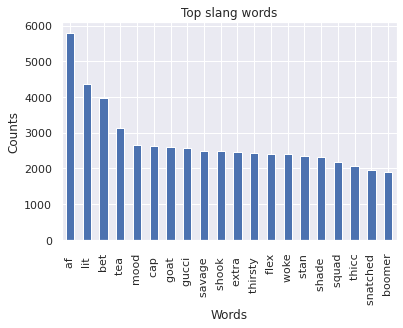

<Figure size 288x288 with 0 Axes>

In [17]:
slag = pd.read_csv("SlagAdded_Clean2.csv")
slag.head()
slag['slang'].str.strip()

top = slag['slang'].value_counts()[0:20].index.tolist()
top_10 = slag[slag['slang'].isin(top)]
top

top_10['slang'].value_counts().plot(kind="bar")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.title("Top slang words")

sns.set(font_scale = 1)
plt.figure(figsize=(4, 4))

plt.show()

Now that the education and urbanness questions have somewhat been dealt with, we can examine the twitter slang data. The above code is graphing the top 20 most frequently used slang terminology among the public in 2019. These words are derived from similar terms used in popular music in that year. The graph shows that words like "af", and "lit" were among the most popular with thousands of mentions in our sample. 

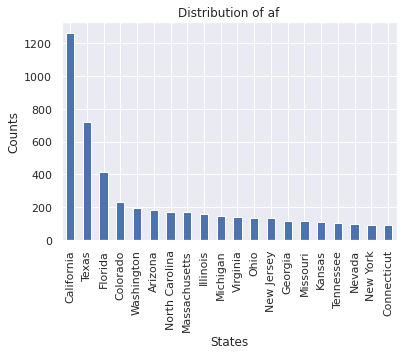

<Figure size 360x360 with 0 Axes>

In [13]:
df = slag.loc[slag['slang'] == 'af  ']
top = (df['state'].value_counts()[:20].index.tolist())
top_val = df['state'].value_counts()[:20].tolist()
top_val
df2 = pd.DataFrame()
df2['state']= top
df2['code'] = top_val

df = slag.loc[slag['slang'] == 'af  ']
top = df['state'].value_counts()[:20].index.tolist()
top_10 = df[df['state'].isin(top)]
top_10['state'].value_counts().plot(kind="bar")
plt.xlabel("States")
plt.ylabel("Counts")
plt.title("Distribution of af")
sns.set(font_scale = 1)
plt.figure(figsize=(5, 5))
plt.show()

If we examine the geographic distribution of the top slang term - "AF" we see that California and Texas very clearly eclipse the rest of the states. This is likely due to their large population. However, not all of the states on this top 20 graph are highly populous, but many of them feature highly educated urban centers like Denver, Phoenix, Nashville etc. Maybe education does play a role?

Text(0.5, 1.0, 'Slang Term Frequency')

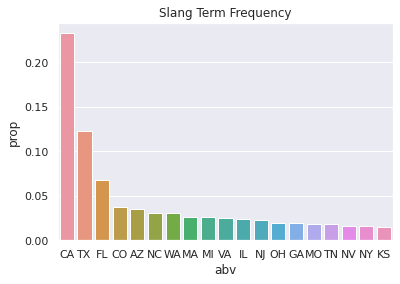

<Figure size 720x720 with 0 Axes>

In [14]:

toper = slag.groupby(['state']).size().reset_index(name='obs')
summer = toper['obs'].sum()
x_list = list(toper['obs'].values)
x_list
prop_list = []
for i in x_list:
    prop_list.append(i/summer)
toper['prop'] = prop_list
toper = toper.sort_values(by=['prop'],ascending = False).iloc[0:19]
toper
toper['abv'] = ['CA','TX','FL','CO','AZ','NC','WA','MA','MI','VA','IL','NJ',"OH","GA","MO",'TN',"NV","NY",'KS']
toper


p = sns.barplot(x='abv',y='prop',data=toper)

plt.figure(figsize=(10, 10))
 
sns.set(font_scale = 1)
p.set_title("Slang Term Frequency")

When we examine the prevelance of all the top slang words in each state, we see that California (given that it has the largest population) seems to have the most mentions of slang terms. In general, many of the most populace states tend to be here, however, there is not a complete pattern of correlation with population. For example, CO and AZ are among the top for slang usage while larger states like PA, MD, WI, MN, and SC are missing from the top. In order to address our research question, we have to check how these states line up with states with the top education rates.

**Putting it all together**

Text(0.5, 1.0, 'Top_25% College educated counties')

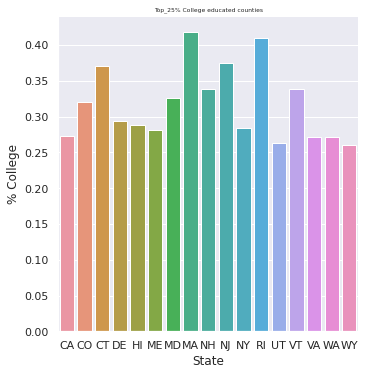

In [18]:
education = pd.read_csv("Education - EducationReport (1) (1).csv")
education.dropna(axis='rows')
part = education['State']

part=part.unique().tolist()
corr_dict = {}
for i in part:
    df = education[(education.State == i)]
    #sns.barplot(x="Urban",y="2019",data = df)
    
    column_2 = df["2019"]
    
    if(abs(column_2.mean())>.26):
        corr_dict[i] = column_2.mean()
corr_dict = {k: v for k, v in sorted(corr_dict.items(), key=lambda item: item[1])}
corr_dict

listy = corr_dict.keys()
df2 = education[education['State'].isin(listy)]
df2
g = sns.catplot(
    data=df2, kind="bar",
    x="State", y="2019",height=5,ci = None)

sns.set(font_scale = .5)
plt.ylabel("% College")
plt.title("Top_25% College educated counties")


Thus, we decided to graph the top 25th percentile of college educated states, and as predicted there is no level of signifcant overlap. For example, some of the states with the lowest proportion of slang terms ranked in the top of the education graph including heavily urbanized states like Hawaii.

Text(0.5, 1.0, 'Tweets vs Education')

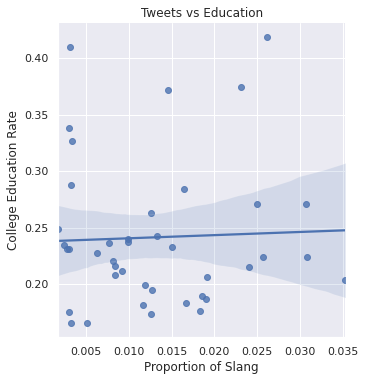

In [19]:
toper = slag.groupby(['state']).size().reset_index(name='obs')
summer = toper['obs'].sum()
x_list = list(toper['obs'].values)
x_list
prop_list = []
for i in x_list:
    prop_list.append(i/summer)
toper['prop'] = prop_list
toper = toper.sort_values(by=['prop'],ascending = False)
toper
toper['abv'] = ['CA','TX','FL','CO','AZ','NC','WA','MA','MI','VA','IL','NJ',"OH","GA","MO",'TN',"NV","NY",'KS','CT','OR','OK','LA','UT','IN','AL','MN','PA','NM','ID','SC','IA','WI','NE','KY','DC','MD','HI','AR','RI','NH','MS','AK','ND','SD',
            'MT']

part = toper['abv']

part=part.unique().tolist()
corr_dict = {}
listy1 = []
listy2 = []
for i in part:
    df = education[(education.State == i)]
    #sns.barplot(x="Urban",y="2019",data = df)
    
    column_2 = df["2019"]
    
    
    listy2.append(column_2.mean())
    listy1.append(i)
toper['education'] = listy2
toper
sns.set(font_scale = 1)
g = sns.lmplot(x="prop", y="education", data=toper.iloc[4:])
plt.xlabel("Proportion of Slang")
plt.ylabel("College Education Rate")
plt.title("Tweets vs Education")

In order to corroborate what the two graphs tell us, we should graph both together. Thus, we created a scatter plot of tweet frequency vs college education rate. We removed a few outliers to give a better read of the data, and then we generated a graph that shows exactly what predicted. There is a very low likleyhood that these two variables are correlated.

We hypothesize that the reason there seems to be little relevance even upon an exploratory glance, between education rates and usage of hip slang terms might be due to one of the factors analyzed earlier. As existing educated areas are getting better and better educated, more cultural capital is concentrated in such areas. Therefore, they have greater abilties to influence rural areas around them, especially augmented by the power of the internet.

In conclusion, there seems to be a correlation between education rates and urbanization across the US on both the state and county levels. Our group hypothesized that this would be the case, and attempted to use that assumption to predict that urbanized, educated areas would be more likely to use pop culture slang terms. Unfortunately, the slang data clearly does not display any correlation between a state's education and slang usage. Therefore, our null hypothesis has been retained and our alternative hypothesis that Urban areas would be much more likely to adopt cultural slang has yet to be substantiated.

# Ethics & Privacy

While there is not a distinct form of identifiable information that can target an individual, the data does specify a geographical region and their educational level. The educational and urban rural divides in this country are among the most stark and contentious, and thus, even with a cultural topic like this, we must make sure that we are not inflaming stereotypes or pre-existing biases about people from various socio-economic walks of life. In addition, in particularly small counties, there are risks just by the nature of their size, we reveal the educational status of individuals.
While the data we’ll be using won’t have any personal identifying information, it’s possible that education could be misrepresented in urban vs country areas. We may have to break up data and group certain variables differently to prevent the misrepresentation. Next, there may be lexical gravitation to certain words or phrases based upon the music listeners due to their geographical region and whether the individual is a resident in an urban vs rural area. The musical demographics may turn out to be biased in its representation due to the varying music tastes among the different states in the U.S. By using Spotify’s Top U.S. music charts instead of the viral charts which are made using global data, we can prevent working with a biased playlist. Different genres of music may also not be represented equally depending on the density (population) of the location, which can greatly alter outcomes. It’s also possible that there may be real estate discrepancies in regions in reference to education level which could affect the different genres of music the people in the region listen to. Our approach will be to have as specific of a target audience as possible, within each of our subsets (geography, music type, education level), to draw compelling conclusions from our data.


# Conclusion & Discussion

Our research question sought to tackle how education level relates to major socio-cultural factors in society. Based on our analysis, we can conclude that there is a correlation between education levels and the urbanization of viral songs in the United States. However, there is no major correlation between educational attainment and cognizance of culturally salient vocabulary. After running our regression model with our dependent values being year and urban, the p-value calculated was 0.0, which suggests a relationship between education level and urbanization. Our initial graph of the two variables showed somewhat of a correlation, but it was not too salient as it did not show a clear downward trajectory as urban index scores increased. However, after digging into the data and finding that over 18% of states had correlations with R values above .5, and looking at those graphs, the likelihood that we could find something significant increased. Finally, after our OLS regression, we were able to show correlation between the two variables. Interestingly, like many other trends in American society, education rates have changed over time relatively unequally with educated areas getting more educated faster, while lesser educated areas show much less dramatic increases in college education rates over time.

When looking at the culturally salient vocabulary, we first looked at the distribution of the twenty most frequent words in Spotify’s Top 50 viral hits of 2019. We then tried to look at the distribution of engagement by State to generally gauge the patterns. Population seemed to be a key determinant, based on the fact that CA and TX made up a large portion of uses of the words in question. However, correlation with education seemed unlikely. Then, we compared this graph with the graph of most educated states and saw limited overlap. Finally, we generated a line plot between education rate and each state’s proportion of tweets relative to a whole, and clearly could perceive that there was very low likelihood of significant correlation.


There are several limitations of this project. First, we utilized only two of the multitude of socio-cultural societal factors. Another major limitation is that we were unable to get county level data for the twitter information we scraped, and so were not able to go any more granular than the state level. Finally, though we found that inequality in education growth was highest among the most urban regions we did not ascertain why, because that would be beyond the scope of the current project. In terms of social impact, this project can help explain the growing educational polarization in American society. Based on our findings, educated, and non college educated Americans may still share common cultural ties, even if they tend to congregate in different type of environments to some degree. This may be because centers of educated individuals are only getting more educated, and are thus increasing in their level of cultural capital, and thus their ability to influence the communities around them. Or it could be that our communities are still integrated enough where we are still physically sharing a common culture. This later possibility  is hinted at by the relatively low pearson's coefficent score for the education/urbanization correlation.


# Team Contributions

M - Overview, Research Question, Hypothesis, Ethics & Privacy, removed tweet duplicates from Twitter dataset, editing sections, Conclusion & Discussion

N - Overview, Research Question, Hypothesis, Background and Prior Work, found datasets, scraped Twitter and Genius for data, cleaned Twitter and Genius datasets, explanation of data, Conclusion & Discussion

H - Overview, Research Question, Hypothesis, Ethics & Privacy, Team Contributions, removed duplicates from Spotify’s top songs data, editing sections, checked grammar, Conclusion & Discussion

K - Overview, Research Question, Hypothesis, Ethics & Privacy, editing sections, checked grammar, Conclusion & Discussion

S - Overview, Research Question, Hypothesis, Background and Prior Work, found, cleaned, graphed, analyzed the education data and its results, explanation of data, Conclusion & Discussion
